In [264]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
from sklearn import ensemble, tree, linear_model
import missingno as msno
from os import listdir

In [ ]:
# define the label names
label_names = {
    0:  "Nucleoplasm",  
    1:  "Nuclear membrane",   
    2:  "Nucleoli",   
    3:  "Nucleoli fibrillar center",   
    4:  "Nuclear speckles",
    5:  "Nuclear bodies",   
    6:  "Endoplasmic reticulum",   
    7:  "Golgi apparatus",   
    8:  "Peroxisomes",   
    9:  "Endosomes",   
    10:  "Lysosomes",   
    11:  "Intermediate filaments",   
    12:  "Actin filaments",   
    13:  "Focal adhesion sites",   
    14:  "Microtubules",   
    15:  "Microtubule ends",   
    16:  "Cytokinetic bridge",   
    17:  "Mitotic spindle",   
    18:  "Microtubule organizing center",   
    19:  "Centrosome",   
    20:  "Lipid droplets",   
    21:  "Plasma membrane",   
    22:  "Cell junctions",   
    23:  "Mitochondria",   
    24:  "Aggresome",   
    25:  "Cytosol",   
    26:  "Cytoplasmic bodies",   
    27:  "Rods & rings"
}

In [265]:
train_labels = pd.read_csv("data/train.csv")
train_labels.describe()

Id Target
count                                  31072  31072
unique                                 31072    582
top     c659f15a-bba7-11e8-b2ba-ac1f6b6435d0      0
freq                                       1   2414

In [266]:
train_labels.head()

Id   Target
0  00070df0-bbc3-11e8-b2bc-ac1f6b6435d0     16 0
1  000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0  7 1 2 0
2  000a9596-bbc4-11e8-b2bc-ac1f6b6435d0        5
3  000c99ba-bba4-11e8-b2b9-ac1f6b6435d0        1
4  001838f8-bbca-11e8-b2bc-ac1f6b6435d0       18

In [267]:
#check how many samples we have
train_labels.shape[0]

31072

In [268]:
# use a pandas dataframe to show the relation between samples and labels, samples as the index and labels as column
reverse_train_labels = dict((v,k) for k,v in label_names.items())
def fill_targets(row):
    row.Target = np.array(row.Target.split(" ")).astype(np.int)
    for num in row.Target:
        name = label_names[int(num)]
        row.loc[name] = 1
    return row

In [269]:
for key in label_names.keys():
    train_labels[label_names[key]] = 0
train_labels = train_labels.apply(fill_targets, axis=1)
train_labels.head()

Id        Target  Nucleoplasm  \
0  00070df0-bbc3-11e8-b2bc-ac1f6b6435d0       [16, 0]            1   
1  000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0  [7, 1, 2, 0]            1   
2  000a9596-bbc4-11e8-b2bc-ac1f6b6435d0           [5]            0   
3  000c99ba-bba4-11e8-b2b9-ac1f6b6435d0           [1]            0   
4  001838f8-bbca-11e8-b2bc-ac1f6b6435d0          [18]            0   

   Nuclear membrane  Nucleoli  Nucleoli fibrillar center  Nuclear speckles  \
0                 0         0                          0                 0   
1                 1         1                          0                 0   
2                 0         0                          0                 0   
3                 1         0                          0                 0   
4                 0         0                          0                 0   

   Nuclear bodies  Endoplasmic reticulum  Golgi apparatus      ...       \
0               0                      0                0      ...        
1               0                      0                1      ...        
2               1                      0                0      ...        
3               0                      0                0      ...        
4               0                      0                0      ...        

   Microtubule organizing center  Centrosome  Lipid droplets  Plasma membrane  \
0                              0           0               0                0   
1                              0           0               0                0   
2                              0           0               0                0   
3                              0           0               0                0   
4                              1           0               0                0   

   Cell junctions  Mitochondria  Aggresome  Cytosol  Cytoplasmic bodies  \
0               0             0          0        0                   0   
1               0             0          0        0                   0   
2               0             0          0        0                   0   
3               0             0          0        0                   0   
4               0             0          0        0                   0   

   Rods & rings  
0             0  
1             0  
2             0  
3             0  
4             0  

[5 rows x 30 columns]

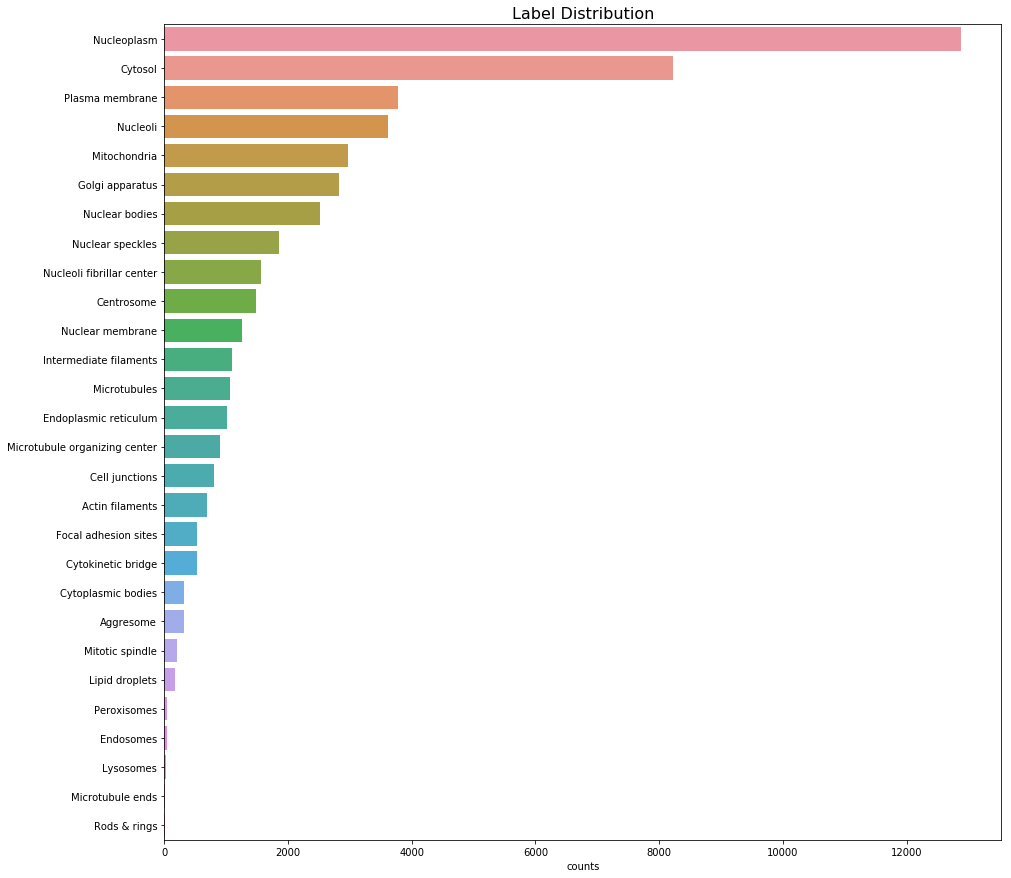

In [270]:
target_counts = train_labels.drop(["Id", "Target"],axis=1).sum(axis=0).sort_values(ascending=False)
plt.figure(figsize=(15,15))
plt.title('Label Distribution',y=1,size=16)
sns.barplot(y=target_counts.index.values, x=target_counts.values, order=target_counts.index)
plt.xlabel("counts")
saveas = "report/yingxin/{}.png".format("distribution")
plt.savefig(saveas, dpi=150)

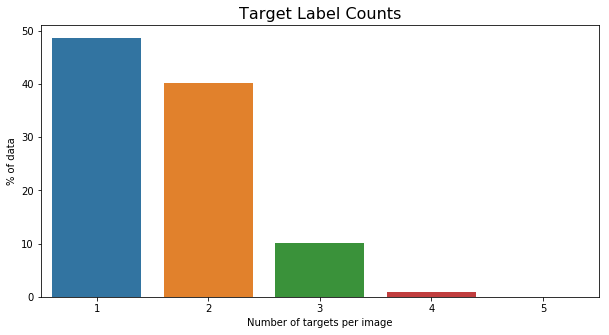

In [271]:
train_labels["number_of_targets"] = train_labels.drop(["Id", "Target"],axis=1).sum(axis=1)
count_perc = np.round(100 * train_labels["number_of_targets"].value_counts() / train_labels.shape[0], 2)
plt.figure(figsize=(10,5))
plt.title('Target Label Counts',y=1,size=16)
sns.barplot(x=count_perc.index.values, y=count_perc.values)
plt.xlabel("Number of targets per image")
plt.ylabel("% of data")
saveas = "report/yingxin/{}.png".format("counts")
plt.savefig(saveas, dpi=150)

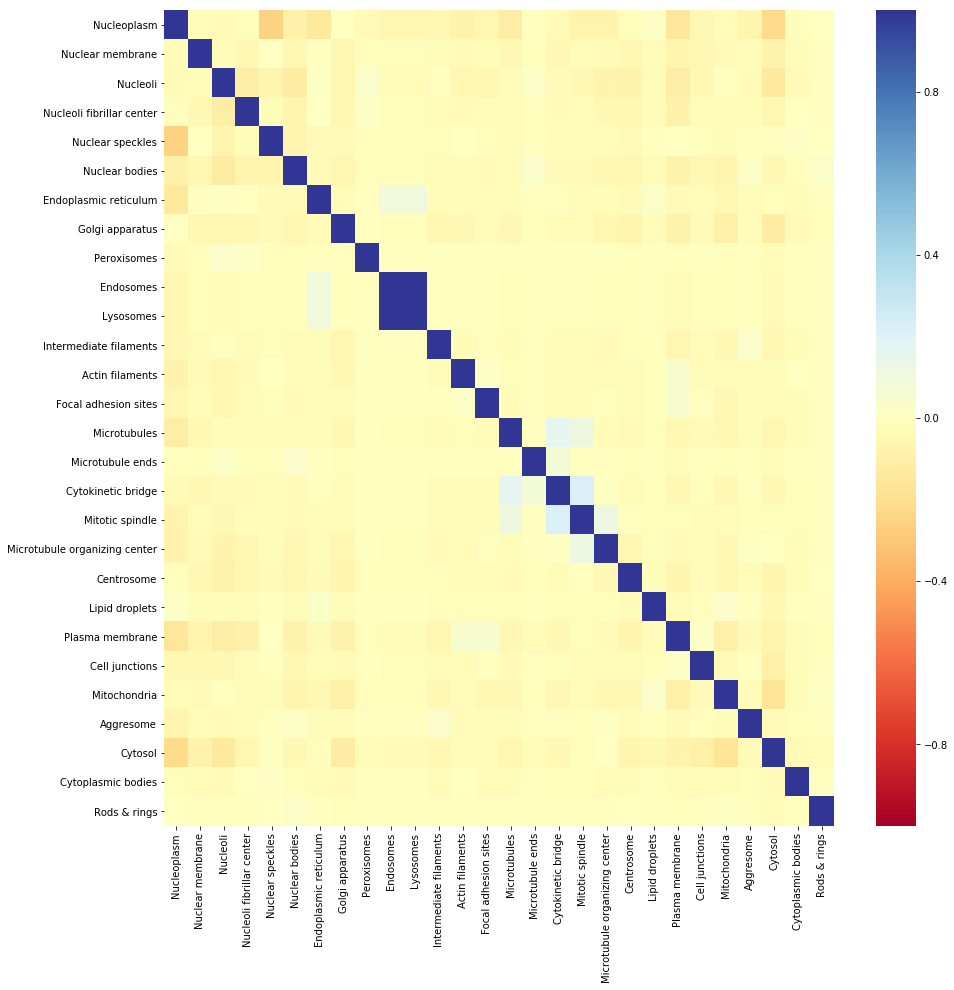

In [272]:
plt.figure(figsize=(15,15))
sns.heatmap(train_labels[train_labels.number_of_targets>1].drop(
    ["Id", "Target", "number_of_targets"],axis=1
).corr(), cmap="RdYlBu", vmin=-1, vmax=1)

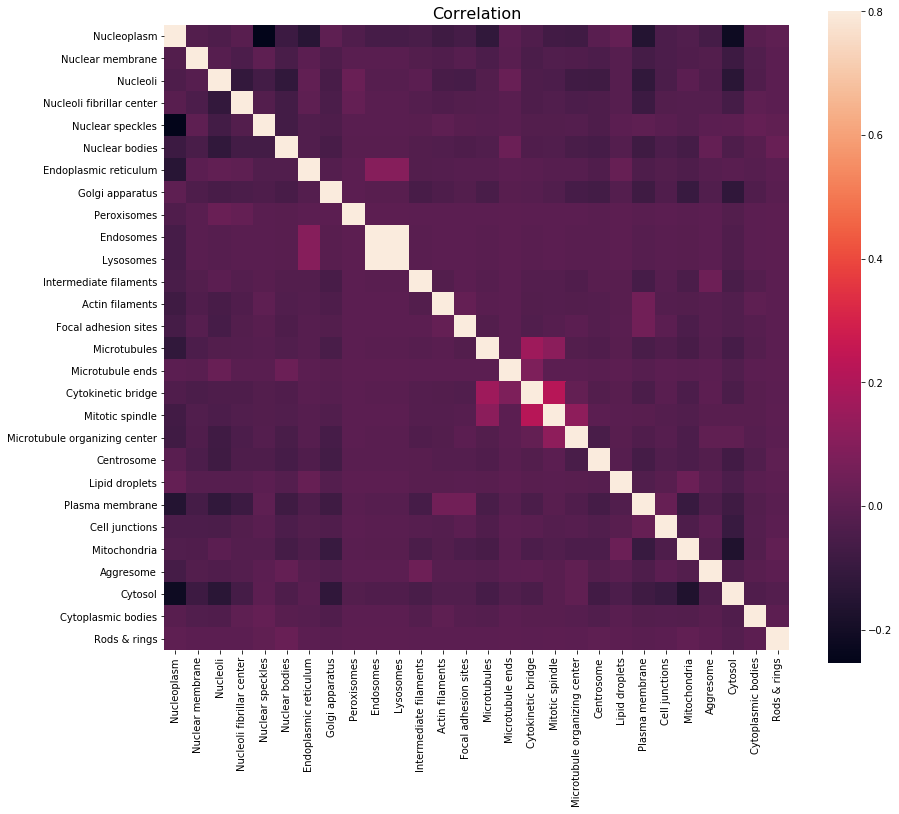

In [273]:
f , ax = plt.subplots(figsize = (14,12))

plt.title('Correlation',y=1,size=16)

sns.heatmap(train_labels[train_labels.number_of_targets>1].drop(
    ["Id", "Target", "number_of_targets"],axis=1
).corr(),square = True,  vmax=0.8)
saveas = "report/yingxin/{}.png".format("colleration")
plt.savefig(saveas, dpi=150)

In [ ]:
def find_counts(special_target, labels):
    counts = labels[labels[special_target] == 1].drop(
        ["Id", "Target", "number_of_targets"],axis=1
    ).sum(axis=0)
    counts = counts[counts > 0]
    counts = counts.sort_values()
    return counts

In [ ]:
lyso_endo_counts = find_counts("Lysosomes", train_labels)

plt.figure(figsize=(10,3))
sns.barplot(x=lyso_endo_counts.index.values, y=lyso_endo_counts.values, palette="Blues")

In [ ]:
rod_rings_counts = find_counts("Rods & rings", train_labels)
plt.figure(figsize=(15,3))
sns.barplot(x=rod_rings_counts.index.values, y=rod_rings_counts.values, palette="Greens")

In [ ]:
peroxi_counts = find_counts("Peroxisomes", train_labels)

plt.figure(figsize=(15,3))
sns.barplot(x=peroxi_counts.index.values, y=peroxi_counts.values, palette="Reds")

In [ ]:
tubeends_counts = find_counts("Microtubule ends", train_labels)

plt.figure(figsize=(15,3))
sns.barplot(x=tubeends_counts.index.values, y=tubeends_counts.values, palette="Purples")

In [ ]:
nuclear_speckles_counts = find_counts("Nuclear speckles", train_labels)

plt.figure(figsize=(15,3))
sns.barplot(x=nuclear_speckles_counts.index.values, y=nuclear_speckles_counts.values, palette="Oranges")
plt.xticks(rotation="70")

In [ ]:
files = listdir("data/train")
for n in range(10):
    print(files[n])

In [ ]:
len(files) / 4 == train_labels.shape[0]

In [ ]:
def load_image(basepath, image_id):
    images = np.zeros(shape=(4,512,512))
    images[0,:,:] = imread(basepath + image_id + "_green" + ".png")
    images[1,:,:] = imread(basepath + image_id + "_red" + ".png")
    images[2,:,:] = imread(basepath + image_id + "_blue" + ".png")
    images[3,:,:] = imread(basepath + image_id + "_yellow" + ".png")
    return images

def make_image_row(image, subax, title):
    subax[0].imshow(image[0], cmap="Greens")
    subax[1].imshow(image[1], cmap="Reds")
    subax[1].set_title("stained microtubules")
    subax[2].imshow(image[2], cmap="Blues")
    subax[2].set_title("stained nucleus")
    subax[3].imshow(image[3], cmap="Oranges")
    subax[3].set_title("stained endoplasmatic reticulum")
    subax[0].set_title(title)
    return subax

def make_title(file_id):
    file_targets = train_labels.loc[train_labels.Id==file_id, "Target"].values[0]
    title = " - "
    for n in file_targets:
        title += label_names[n] + " - "
    return title

In [ ]:
class TargetGroupIterator:
    
    def __init__(self, target_names, batch_size, basepath):
        self.target_names = target_names
        self.target_list = [reverse_train_labels[key] for key in target_names]
        self.batch_shape = (batch_size, 4, 512, 512)
        self.basepath = basepath
    
    def find_matching_data_entries(self):
        train_labels["check_col"] = train_labels.Target.apply(
            lambda l: self.check_subset(l)
        )
        self.images_identifier = train_labels[train_labels.check_col==1].Id.values
        train_labels.drop("check_col", axis=1, inplace=True)
    
    def check_subset(self, targets):
        return np.where(set(targets).issubset(set(self.target_list)), 1, 0)
    
    def get_loader(self):
        filenames = []
        idx = 0
        images = np.zeros(self.batch_shape)
        for image_id in self.images_identifier:
            images[idx,:,:,:] = load_image(self.basepath, image_id)
            filenames.append(image_id)
            idx += 1
            if idx == self.batch_shape[0]:
                yield filenames, images
                filenames = []
                images = np.zeros(self.batch_shape)
                idx = 0
        if idx > 0:
            yield filenames, images

In [188]:
train_path = "data/train"
your_choice = ["Lysosomes", "Endosomes"]
your_batch_size = 3

In [189]:
imageloader = TargetGroupIterator(your_choice, your_batch_size, train_path)
imageloader.find_matching_data_entries()
iterator = imageloader.get_loader()

NameError: name 'TargetGroupIterator' is not defined

In [ ]:
file_ids, images = next(iterator)

fig, ax = plt.subplots(len(file_ids),4,figsize=(20,5*len(file_ids)))
if ax.shape == (4,):
    ax = ax.reshape(1,-1)
for n in range(len(file_ids)):
    make_image_row(images[n], ax[n], make_title(file_ids[n]))

16 _ 0
16 - Cytokinetic bridge
0 - Nucleoplasm


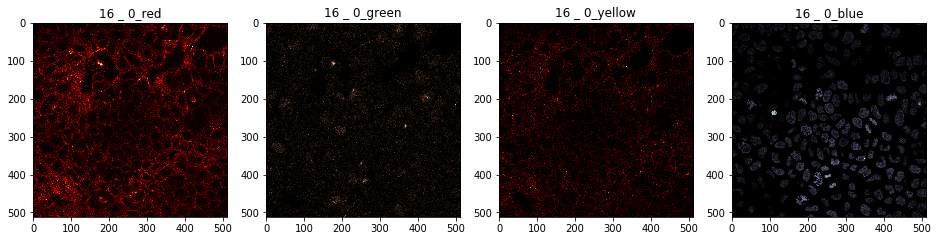

In [315]:
############################################
# another exploring
def print_labels(target):
    label_ints = [int(l) for l in target]
    for i in label_ints:
        print("{} - {}".format(i, label_names[i]))
def plot_protein_images(id,target):
    fig, axs = plt.subplots(1, 4, figsize=(16,4))
    if len(target) > 1:
        label = ' _ '.join([str(x) for x in target])
    else:
        label = label_names[target[0]]
    print(label)
    for i, color in enumerate(['red', 'green', 'yellow', 'blue']):
        cmap = ["hot","copper","afmhot","bone"]
        filename = "train/{}_{}.png".format(id, color)
        im = plt.imread("data/" + filename)
        title = "{}_{}".format(label, color)
        axs[i].set_title(title)
        axs[i].imshow(im, cmap=cmap[i])
        saveas = "report/yingxin/singlelabel/{}.png".format(label)
        plt.savefig(saveas, dpi=150)
plot_protein_images(train_labels.Id[0],train_labels.Target[0])
print_labels(train_labels.Target[0])        

16 - Cytokinetic bridge
18 - Microtubule organizing center
17 - Mitotic spindle


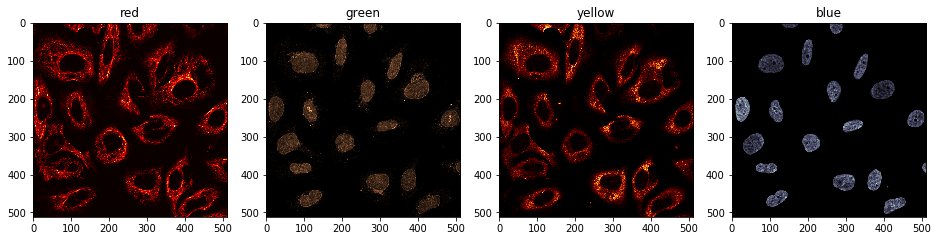

In [242]:
plot_protein_images(train_labels.Id[1],train_labels.Target[164])
print_labels(train_labels.Target[164])  

10  is missing
15  is missing
17  is missing


/home/bear-b/users/hcen001/miniconda3/envs/cap5610/lib/python3.5/site-packages/matplotlib/pyplot.py:513: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


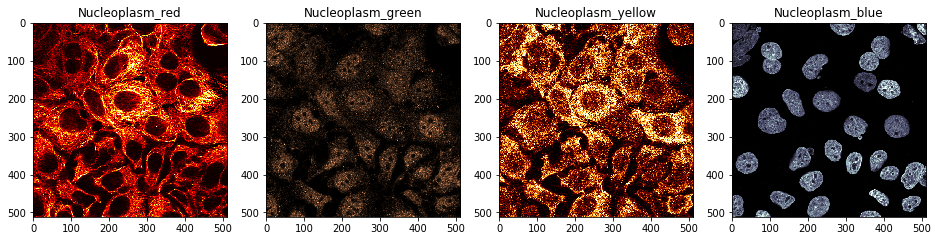

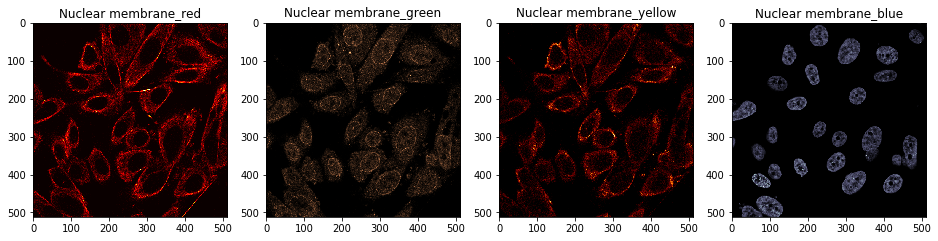

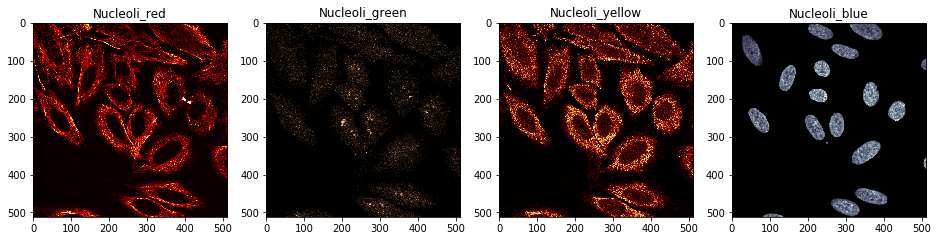

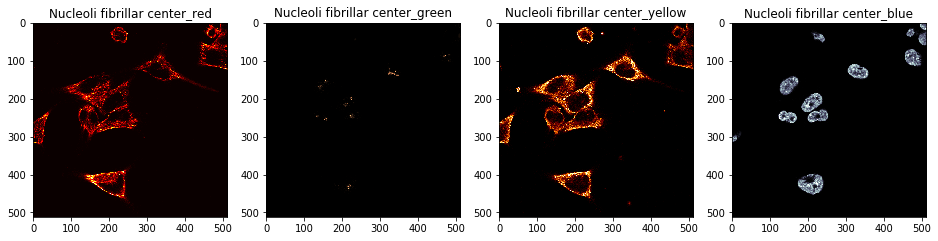

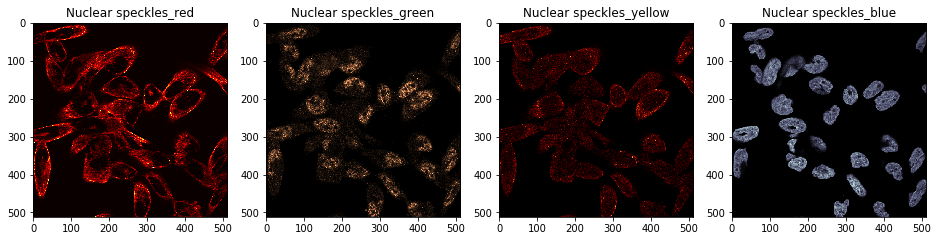

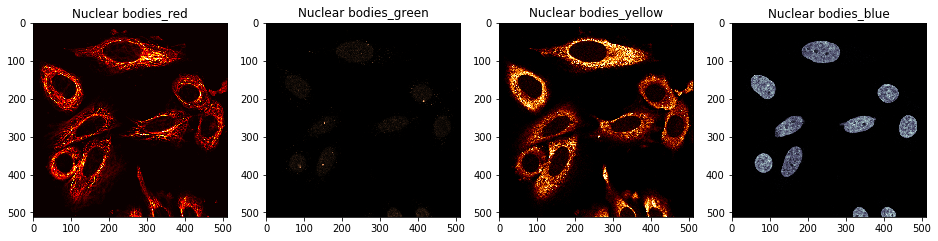

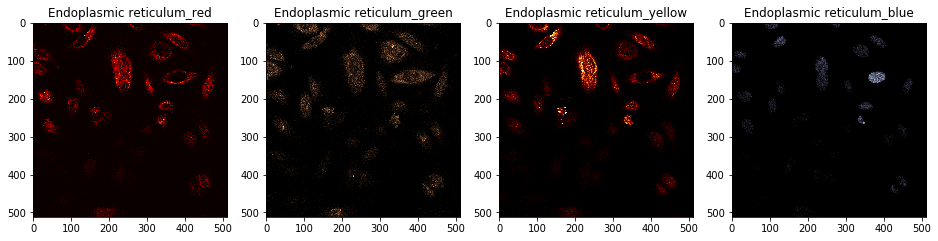

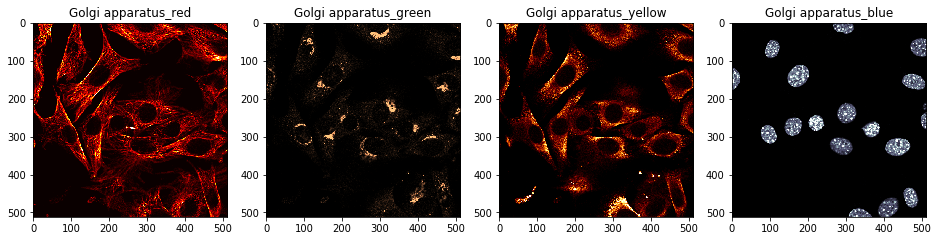

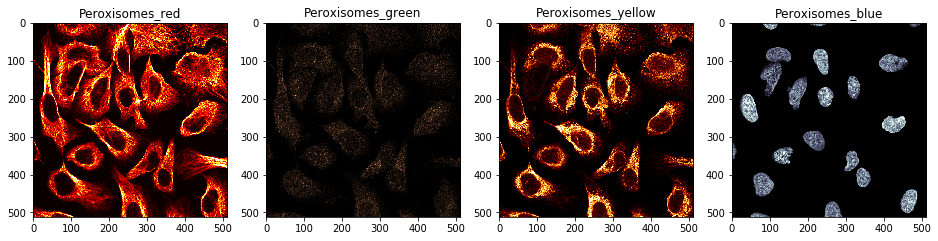

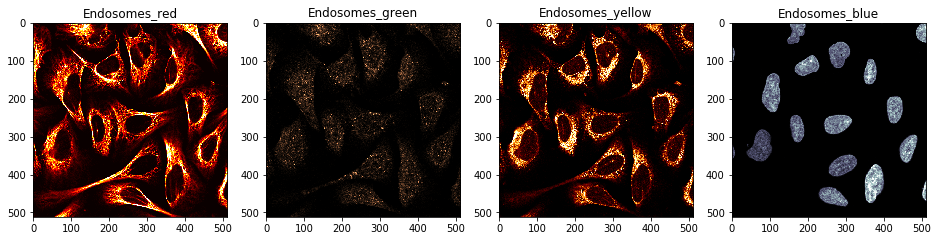

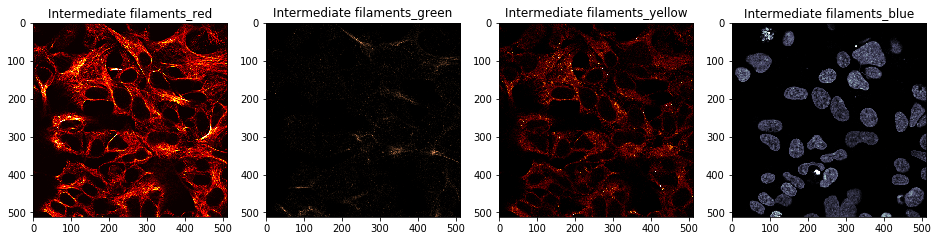

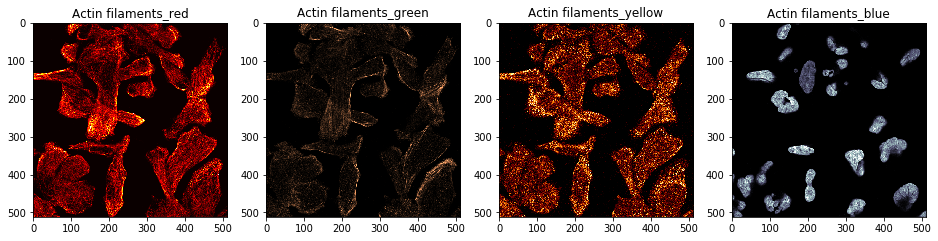

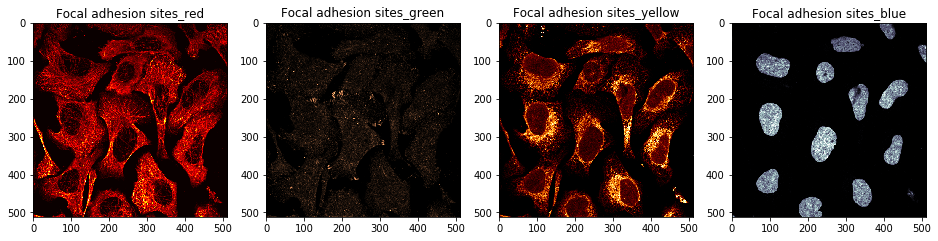

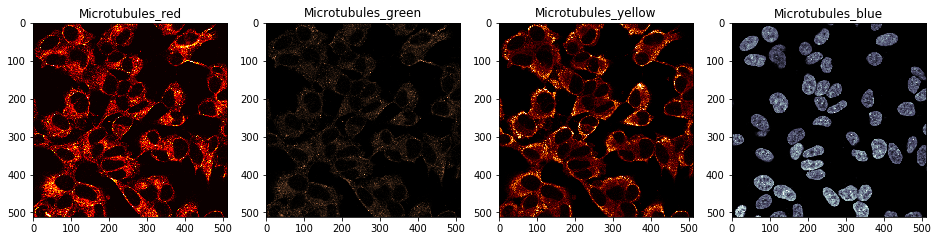

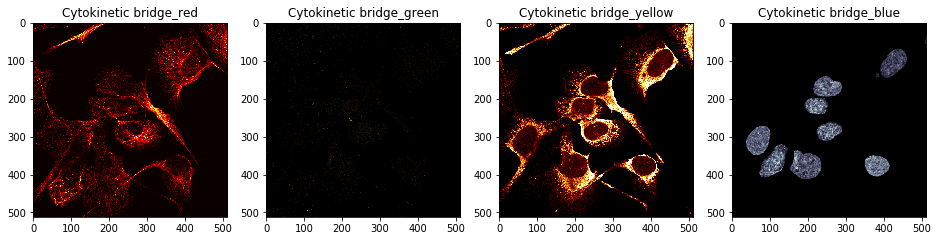

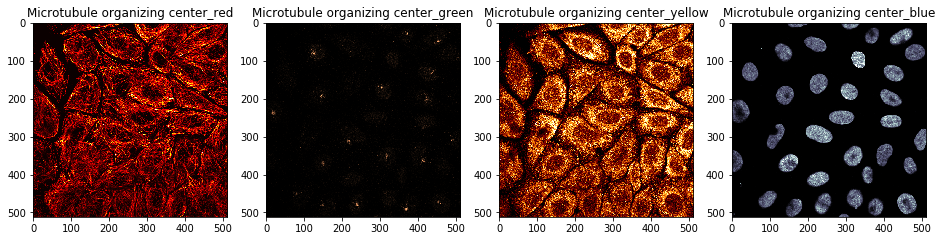

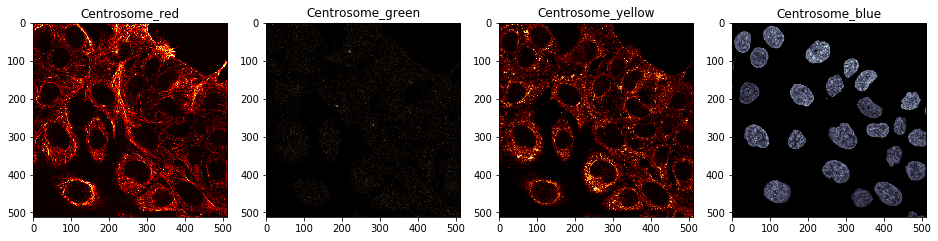

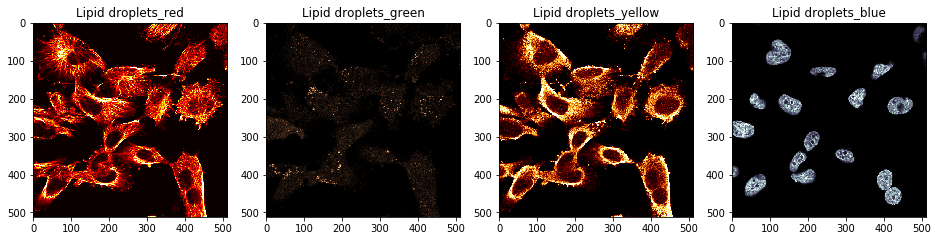

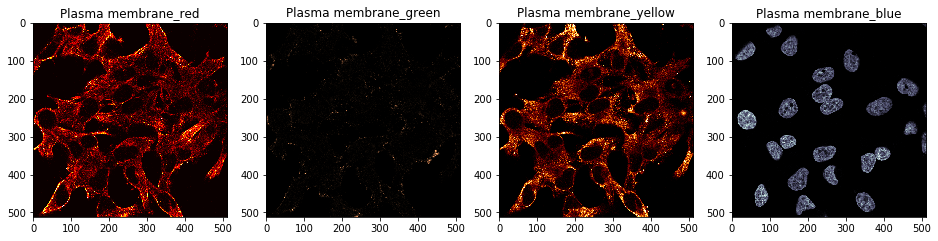

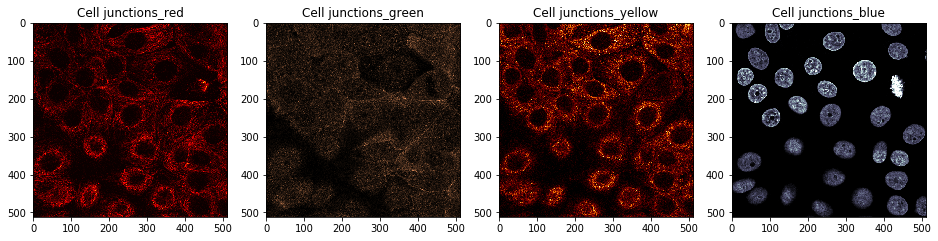

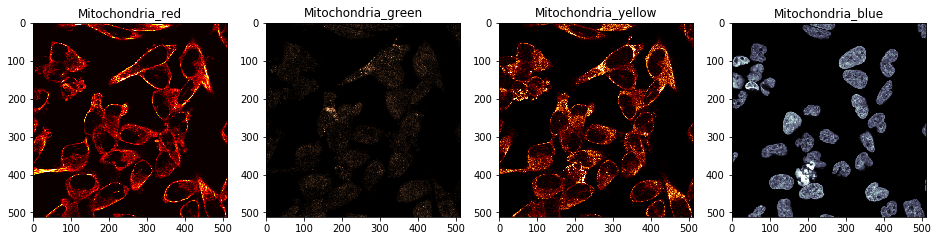

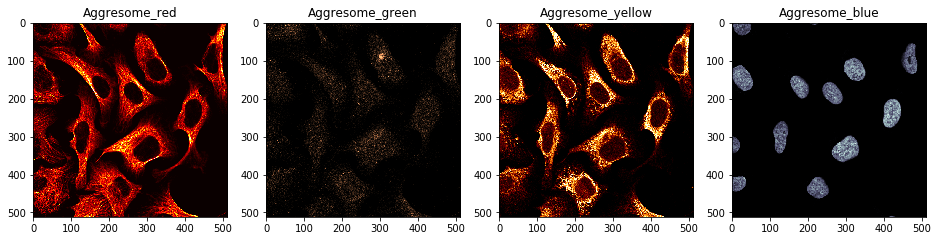

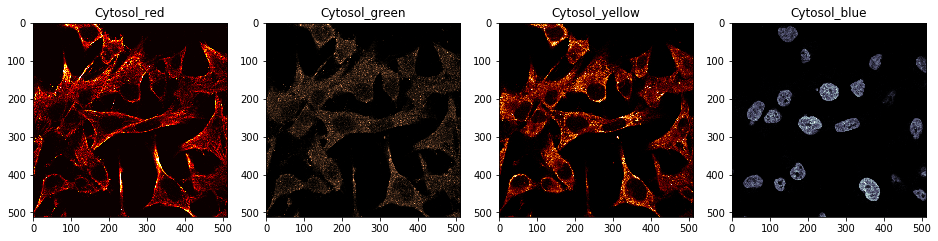

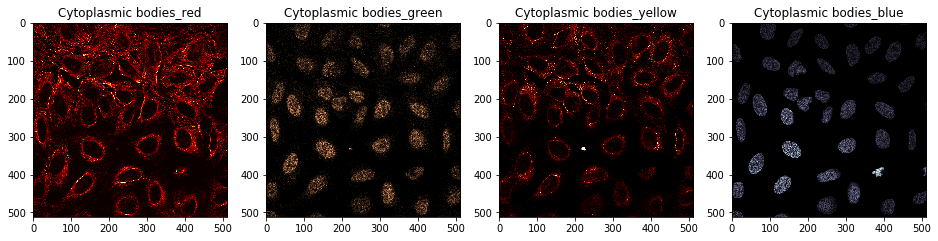

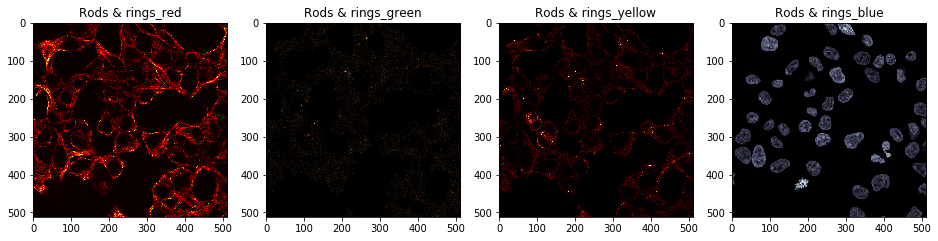

In [243]:
single_train_labels = train_labels[train_labels["number_of_targets"]==1]
for index in range(len(label_names)):
    if len(single_train_labels[single_train_labels.Target==int(index)])>0:
        #print_labels(single_train_labels[single_train_labels.Target==int(index)].Target.iloc[0])
        plot_protein_images(single_train_labels[single_train_labels.Target==int(index)]['Id'].iloc[0],single_train_labels[single_train_labels.Target==int(index)]['Target'].iloc[0])
    else :
        print(index," is missing")

16 _ 14 _ 17


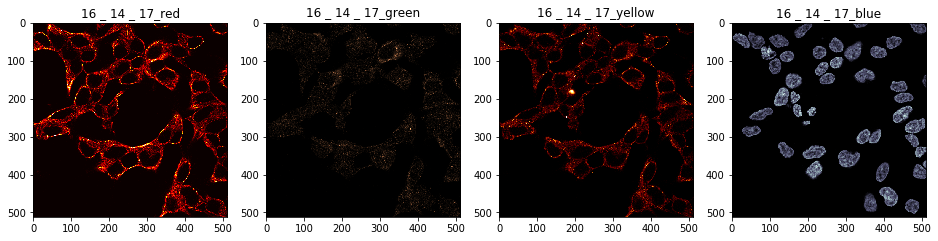

In [318]:

# print(train_labels[(17 in train_labels.Target)==True])
new_df = train_labels[train_labels.Target.map(lambda x: 17 in x)].reset_index()
new_df
#print_labels(new_df.Id.iloc[0]) 
plot_protein_images(new_df.Id.iloc[0],new_df.Target.iloc[0])

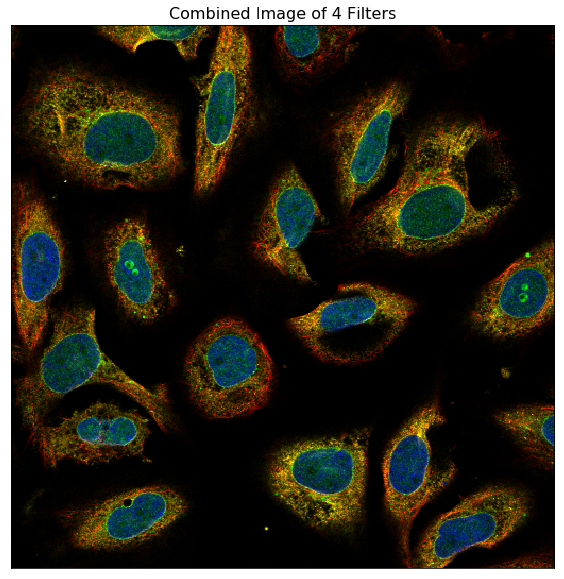

In [319]:
def plot_color_protein_images(id, ax=None, figsize=(10,10)):
    # use ax argument so this function can be using to plot in a grid using axes
    if ax==None:
        fig, ax = plt.subplots(1, 1, figsize=figsize)

    # read all color images
    all_images = np.empty((512,512,4))
    for i, color in enumerate(['red', 'green', 'yellow', 'blue']):
        all_images[:,:,i] = plt.imread("data/" + "train/{}_{}.png".format(id, color))

    # define transformation matrix
    # note that yellow is made usign red and green
    # but you can tune this color conversion yourself
    T = np.array([[1,0,1,0],[0,1,1,0],[0,0,0,1]])
    
    # convert to rgb
    rgb_image = np.matmul(all_images.reshape(-1, 4), np.transpose(T))
    rgb_image = rgb_image.reshape(all_images.shape[0], all_images.shape[0], 3)
    rgb_image = np.clip(rgb_image, 0, 1)
    
    # plot
    ax.imshow(rgb_image)
    ax.set(xticks=[], yticks=[])
    plt.title('Combined Image of 4 Filters',y=1,size=16)
    saveas = "report/yingxin/{}.png".format("combined")
    plt.savefig(saveas, dpi=150)

plot_color_protein_images(train_labels.Id[1])